# Nama : Guruh Sukmo
# Akun cohort : a209ybf187@devacademy.id

#Import Library and Data


In [66]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, recall_score, precision_score, f1_score
from collections import Counter


In [67]:
import pandas as pd

url = "https://raw.githubusercontent.com/Zuckmo/Sentimen_Aanalisis_Ojek_di_Indonesia/master/playstore_reviews.csv"

try:
    df = pd.read_csv(url, encoding='utf-8')
except UnicodeDecodeError:
    df = pd.read_csv(url, encoding='latin-1')

df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   userName  44999 non-null  object
 1   content   45000 non-null  object
 2   score     45000 non-null  int64 
 3   at        45000 non-null  object
 4   app_name  45000 non-null  object
dtypes: int64(1), object(4)
memory usage: 1.7+ MB


In [68]:
df.head()
df.info()
df.describe(include="all")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   userName  44999 non-null  object
 1   content   45000 non-null  object
 2   score     45000 non-null  int64 
 3   at        45000 non-null  object
 4   app_name  45000 non-null  object
dtypes: int64(1), object(4)
memory usage: 1.7+ MB


,userName,content,score,at,app_name
count,44999,45000,45000.000000,45000,45000
unique,4468,27604,NaN,44841,3
top,Pengguna Google,mantap,NaN,2025-04-02 11:26:47,grab
freq,40507,1501,NaN,2,15000
mean,NaN,NaN,4.164111,NaN,NaN
std,NaN,NaN,1.518093,NaN,NaN
min,NaN,NaN,1.000000,NaN,NaN
25%,NaN,NaN,4.000000,NaN,NaN
50%,NaN,NaN,5.000000,NaN,NaN
75%,NaN,NaN,5.000000,NaN,NaN


# Preprocessing


In [69]:
def filter_tokens_by_length(dataFrame, column, min_words, max_words):
    word_count = dataFrame[column].astype(str).apply(lambda x: len(x.split()))
    mask = (word_count >= min_words) & (word_count <= max_words)
    filtered_data = dataFrame[mask]
    return filtered_data

min_words = 1
max_words = 30
df = filter_tokens_by_length(df, 'content', min_words, max_words)
df.info()



<class 'pandas.core.frame.DataFrame'>
Index: 42511 entries, 0 to 44999
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   userName  42510 non-null  object
 1   content   42511 non-null  object
 2   score     42511 non-null  int64 
 3   at        42511 non-null  object
 4   app_name  42511 non-null  object
dtypes: int64(1), object(4)
memory usage: 1.9+ MB


In [70]:
columns_5 =df[["userName", "score", "at", "app_name"]]

In [71]:
pip install Sastrawi

In [72]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory, StopWordRemover, ArrayDictionary

more_stop_words = []

stop_words = StopWordRemoverFactory().get_stop_words()
stop_words.extend(more_stop_words)

new_array = ArrayDictionary(stop_words)
stop_words_remover_new = StopWordRemover(new_array)

def stopword(str_text):
  return stop_words_remover_new.remove(str_text)

df['content'] = df['content'].apply(stopword)
df.sample(5)

,userName,content,score,at,app_name
10193,Pengguna Google,Bagus,5,2025-02-04 22:31:36,grab
830,Pengguna Google,good job,5,2025-04-08 00:51:13,grab
42760,Pengguna Google,Mengecewakan,1,2025-02-05 05:57:51,gojek
25088,Pengguna Google,tetap semangat pa,5,2025-03-14 10:00:38,maxim
11022,Pengguna Google,Pelayanan sangat baik,5,2025-01-30 08:06:31,grab


In [73]:
#tokenized
tokenized = df["content"].apply(lambda x:x.split())
tokenized

,content
0,[bagus]
1,"[mengantarkan, selamat]"
2,"[sangat, membantu,, semua, jd, mudah, perjalanan]"
3,"[bagus, aflikasinya, lancar]"
4,"[sangat, membantu]"
...,...
44993,"[sangat, membantu, sekali]"
44994,[Top]
44996,"[Sangat, membantu,sangat, memudahkan🤩🤩]"
44998,"[Pelayanan, lambat]"


In [74]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

# Inisialisasi stemmer
factory = StemmerFactory()
stemmer = factory.create_stemmer()

# Fungsi stemming per kalimat
def stemming(text_cleaning):
    text_cleaning = str(text_cleaning)
    return stemmer.stem(text_cleaning)


tokenized = tokenized.apply(stemming)

tokenized


'from Sastrawi.Stemmer.StemmerFactory import StemmerFactory\n\n# Inisialisasi stemmer\nfactory = StemmerFactory()\nstemmer = factory.create_stemmer()\n\n# Fungsi stemming per kalimat\ndef stemming(text_cleaning):\n    text_cleaning = str(text_cleaning)\n    return stemmer.stem(text_cleaning)\n\n\ntokenized = tokenized.apply(stemming)\n\ntokenized'

In [75]:
df = pd.concat([tokenized, columns_5], axis=1)

# Save the DataFrame to a CSV file
df.to_csv('modified_playstore_reviews.csv', index=False, encoding='utf-8')

"df = pd.concat([tokenized, columns_5], axis=1)\n\n# Save the DataFrame to a CSV file\ndf.to_csv('modified_playstore_reviews.csv', index=False, encoding='utf-8')"

In [76]:
#df_prep = df.copy()


In [77]:
#Data Preprocessing

url = "https://raw.githubusercontent.com/Zuckmo/Sentimen_Aanalisis_Ojek_di_Indonesia/master/modified_playstore_reviews.csv"

try:
    df_prep = pd.read_csv(url, encoding='utf-8')
except UnicodeDecodeError:
    df_prep = pd.read_csv(url, encoding='latin-1')

df_prep.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42511 entries, 0 to 42510
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   content   40714 non-null  object
 1   userName  42510 non-null  object
 2   score     42511 non-null  int64 
 3   at        42511 non-null  object
 4   app_name  42511 non-null  object
dtypes: int64(1), object(4)
memory usage: 1.6+ MB


In [78]:
# melakukan lowercas

df_prep['content'] = df_prep['content'].str.lower()


In [79]:
import re

# Define the function to remove non-alphabetic characters
def remove_non_alphabet(text):

    return re.sub(r'[^a-zA-Z\s]', '', text)

# Apply the function to the 'content' column
df_prep['content'] = df_prep['content'].fillna('')
df_prep['content'] = df_prep['content'].apply(remove_non_alphabet)


In [80]:
def remove_non_alphabet(text):
    if isinstance(text, str):
        return re.sub(r'[^a-zA-Z\s]', '', text)
    return ''


In [81]:
df_prep = df_prep.dropna(subset=['content'])
df_prep['content'] = df_prep['content'].apply(remove_non_alphabet)


In [82]:
# membersihkan karakter non alphabet di data df_prep

import re

def remove_non_alphabet(text):
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    return text

df_prep['content'] = df_prep['content'].apply(remove_non_alphabet)


In [83]:
!pip install emoji


In [84]:
# menghapus emoji di data df_prep

import emoji

def remove_emoji(text):
    return emoji.replace_emoji(text, replace='')

df_prep['content'] = df_prep['content'].apply(remove_emoji)


In [85]:
import requests
import json
import pandas as pd

# Ambil kamus dari GitHub (raw JSON)
url = "https://raw.githubusercontent.com/Zuckmo/Sentimen_Aanalisis_Ojek_di_Indonesia/refs/heads/master/kamus_alay.json"
response = requests.get(url)
alay_dict = response.json()

# Fungsi normalisasi
def normalize_alay(text):
    normalized_text = []
    for word in text.lower().split():
        if word in alay_dict:
            normalized_text.append(alay_dict[word])
        else:
            normalized_text.append(word)
    return ' '.join(normalized_text)



# Terapkan normalisasi ke kolom 'content'
df_prep['content'] = df_prep['content'].apply(normalize_alay)

print(df_prep.head())


                             content         userName  score  \
0                              bagus  Pengguna Google      5   
1                      antar selamat  Pengguna Google      5   
2  sangat bantu semua jd mudah jalan  Pengguna Google      5   
3           bagus aflikasinya lancar  Pengguna Google      5   
4                       sangat bantu  Pengguna Google      4   

                    at app_name  
0  2025-04-12 22:43:39     grab  
1  2025-04-12 22:43:01     grab  
2  2025-04-12 21:06:01     grab  
3  2025-04-12 20:56:41     grab  
4  2025-04-12 20:47:38     grab  


# Labelling


In [86]:
df_prep.sample(10)

,content,userName,score,at,app_name
25694,baik sekali ramah,Pengguna Google,5,2025-03-08 13:29:55,maxim
24061,top,Pengguna Google,5,2025-03-14 17:35:22,maxim
35210,nyaman,Pengguna Google,5,2025-03-12 01:12:33,gojek
16231,sangat sahabat,Pengguna Google,5,2025-04-07 04:58:37,maxim
14043,nice,achonk baskhoro,5,2025-01-06 12:09:53,grab
13647,mantap,athalia lybarista,5,2025-01-09 02:33:47,grab
23386,baik,Pengguna Google,5,2025-03-17 05:06:02,maxim
7353,mantap bagus,Pengguna Google,5,2025-02-21 16:27:52,grab
28923,mantap,PUAFIRZJA ALRAIT FILIS,5,2025-02-25 04:46:33,maxim
32922,driver good ramah,Pengguna Google,5,2025-03-25 07:31:51,gojek


In [87]:
def label_sentiment(score):
    if score >= 4:
        return 'positive'
    elif score == 3:
        return 'neutral'
    else:
        return 'negative'

df_prep['sentiment'] = df_prep['score'].apply(label_sentiment)

In [88]:
df_count = df_prep.sentiment.value_counts()
df_count

,count
sentiment,
positive,34816
negative,6631
neutral,1064


In [89]:
df0 = df_prep.copy()

# Visualization

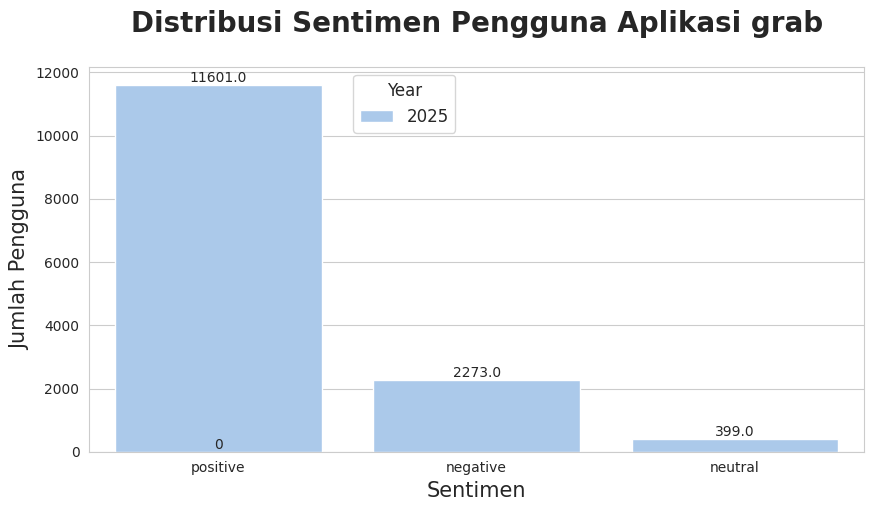

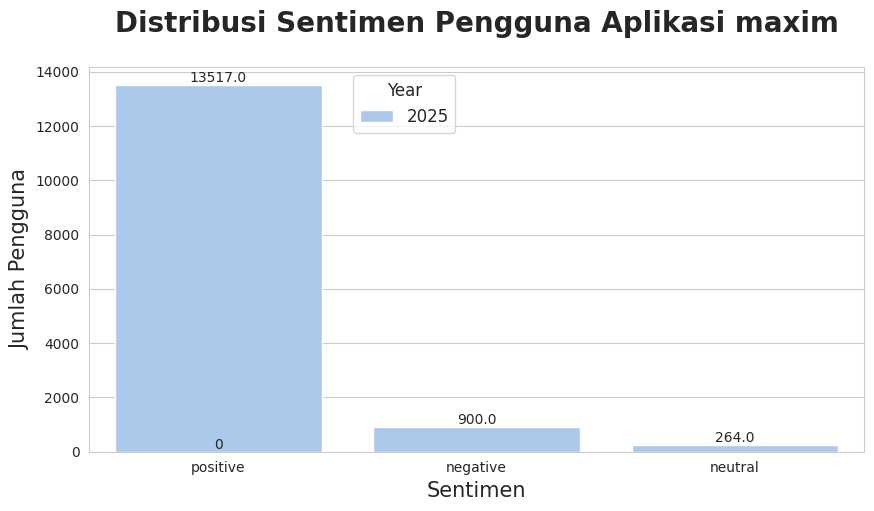

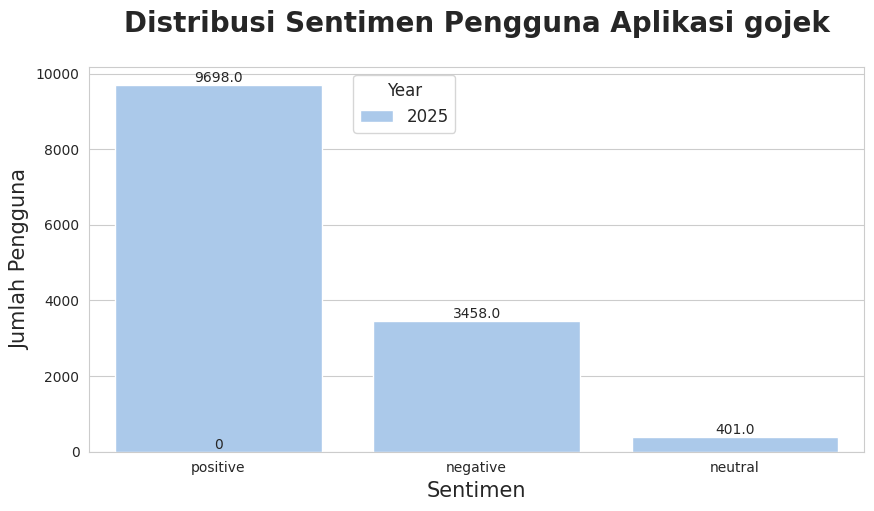

In [90]:
df0["at"] = pd.to_datetime(df0["at"])
df0["month"] = df0["at"].dt.month
df0["year"] = df0["at"].dt.year
app_name = ["grab", "maxim", "gojek"]

for app in app_name:
  df_app = df0[df0["app_name"]== app]
  position = range(len(df_app["sentiment"].unique()))
  labels = sorted(df_app["sentiment"].unique())

  ax = sns.set_style(style="whitegrid")
  plt.figure(figsize=(10,5))
  ax = sns.countplot(x="sentiment", hue="year", data=df_app, palette="pastel")

  for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width()/2, rect.get_height(), rect.get_height(), ha='center', va='bottom')

  plt.legend(fontsize=12, bbox_to_anchor=(0.33, 1), ncol=3, title="Year", title_fontsize=12)
  plt.title(f"Distribusi Sentimen Pengguna Aplikasi {app}", fontsize=20, fontweight="bold", pad=25)
  plt.xlabel("Sentimen", fontsize=15)
  plt.ylabel("Jumlah Pengguna", fontsize=15)
  plt.show()


Penilaian Total (berdasarkan sentimen positif dan netral):

Maxim – 13.781

Grab – 12.000

Gojek – 10.009

> Kesimpulan:
Maxim menempati posisi pertama dalam jumlah total penilaian positif dan netral dari pengguna, menunjukkan kepuasan yang tinggi.

> Grab menyusul di posisi kedua.

> Gojek berada di posisi ketiga, dengan jumlah sentimen negatif yang relatif lebih tinggi dibanding dua aplikasi lainnya.

# Prepare Data Training


In [91]:
df_grab = df0[df0["app_name"]=="grab"]
df_maxim = df0[df0["app_name"]=="maxim"]
df_gojek = df0[df0["app_name"]=="gojek"]

In [92]:
#buat data training dan testing
X_grab = df_grab["content"]
y_grab = df_grab["sentiment"]

X_maxim = df_maxim["content"]
y_maxim = df_maxim["sentiment"]

X_gojek = df_gojek["content"]
y_gojek = df_gojek["sentiment"]

In [93]:
data= {
    "grab": [X_grab, y_grab],
    "maxim": [X_maxim, y_maxim],
    "gojek": [X_gojek, y_gojek]
}


In [94]:
# 1. Uninstall default torch & transformers dari Colab
!pip uninstall -y torch torchvision torchaudio transformers

# 2. Install versi yang cocok dengan IndoBERT
!pip install torch==1.13.1 transformers==4.26.1 scikit-learn pandas


  Using cached torch-1.13.1-cp311-cp311-manylinux1_x86_64.whl.metadata (24 kB)
  Using cached transformers-4.26.1-py3-none-any.whl.metadata (100 kB)
  Using cached nvidia_cuda_runtime_cu11-11.7.99-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cudnn_cu11-8.5.0.96-2-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cublas_cu11-11.10.3.66-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cuda_nvrtc_cu11-11.7.99-2-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached tokenizers-0.13.3-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (6.7 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 887.4/887.4 MB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 50.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 317.1/317.1 MB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.0/21.0 MB 40.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 

# Training Data (Machine Learning)

In [95]:

# Untuk IndoBERT
from transformers import BertTokenizer, BertModel
import torch
import numpy as np

results = []

# metode vektorisasi: "tfidf" atau "indobert"
vectorizer_choice = "tfidf"

def get_bert_vectors(texts, tokenizer, model):
    model.eval()
    vectors = []
    with torch.no_grad():
        for sentence in texts:
            inputs = tokenizer(sentence, return_tensors='pt', truncation=True, padding=True)
            outputs = model(**inputs)
            cls_embedding = outputs.last_hidden_state[:, 0, :].squeeze()
            vectors.append(cls_embedding.numpy())
    return np.array(vectors)

for app, (X, y) in data.items():
    x_train, x_test, y_train, y_test = train_test_split(X.astype(str), y, test_size=0.2, random_state=42)

    # Vektorisasi berdasarkan pilihan
    if vectorizer_choice == "tfidf":
        vectorizer = TfidfVectorizer()
        x_train_vectorized = vectorizer.fit_transform(x_train).toarray()
        x_test_vectorized = vectorizer.transform(x_test).toarray()

    elif vectorizer_choice == "indobert":
        tokenizer = BertTokenizer.from_pretrained("indobenchmark/indobert-base-p1")
        bert_model = BertModel.from_pretrained("indobenchmark/indobert-base-p1")
        x_train_vectorized = get_bert_vectors(x_train, tokenizer, bert_model)
        x_test_vectorized = get_bert_vectors(x_test, tokenizer, bert_model)

    else:
        raise ValueError("Pilihan vectorizer tidak dikenali. Gunakan: 'tfidf' atau 'indobert'.")

    classifiers = {
        "KNN": KNeighborsClassifier(n_neighbors=5),
        "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
        "SVM": SVC(),
        "Naive Bayes": MultinomialNB()
    }

    for name, clf in classifiers.items():
        if vectorizer_choice == 'indobert' and name == "Naive Bayes":
            continue

        clf.fit(x_train_vectorized, y_train)
        y_pred = clf.predict(x_test_vectorized)

        results.append({
            "app_name": app,
            "Classifier": name,
            "Accuracy": accuracy_score(y_test, y_pred),
            "Recall": recall_score(y_test, y_pred, average='weighted'),
            "Precision": precision_score(y_test, y_pred, average='weighted'),
            "F1 Score": f1_score(y_test, y_pred, average='weighted')
        })


pd.DataFrame(results)


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/m

,app_name,Classifier,Accuracy,Recall,Precision,F1 Score
0,grab,KNN,0.828371,0.828371,0.806813,0.767932
1,grab,Random Forest,0.914186,0.914186,0.893199,0.903303
2,grab,SVM,0.923643,0.923643,0.901051,0.912095
3,grab,Naive Bayes,0.916988,0.916988,0.893269,0.904934
4,maxim,KNN,0.927818,0.927818,0.897159,0.897767
5,maxim,Random Forest,0.949608,0.949608,0.931509,0.940320
6,maxim,SVM,0.957099,0.957099,0.938459,0.947259
7,maxim,Naive Bayes,0.954716,0.954716,0.935208,0.943349
8,gojek,KNN,0.752212,0.752212,0.753359,0.672700
9,gojek,Random Forest,0.896018,0.896018,0.879360,0.886721


# Comparative Evaluation


<ipython-input-97-9ceed86fd688>:21: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(
<ipython-input-97-9ceed86fd688>:21: UserWarning: The palette list has more values (8) than needed (4), which may not be intended.
  sns.barplot(
<ipython-input-97-9ceed86fd688>:21: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(
<ipython-input-97-9ceed86fd688>:21: UserWarning: The palette list has more values (8) than needed (4), which may not be intended.
  sns.barplot(
<ipython-input-97-9ceed86fd688>:21: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(
<ipython-input-97-9ceed86fd688>:21: UserWarning: The palette list has more values (8) than needed (4), which may not be intended.
  sns.barplot(


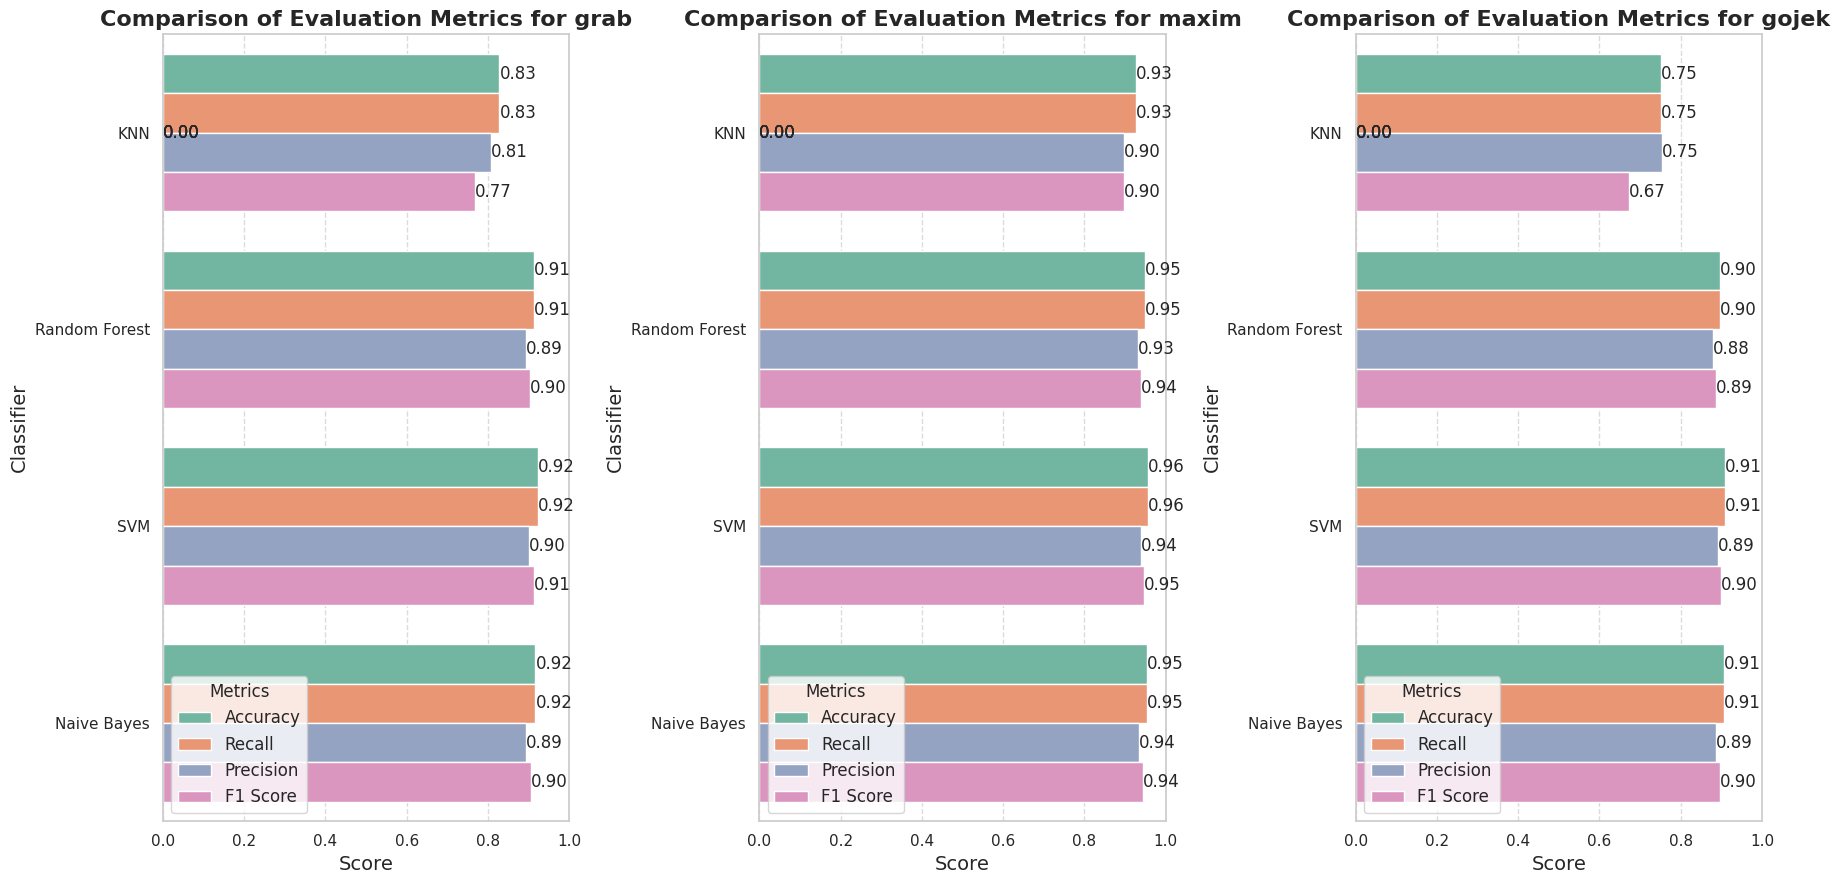

In [97]:
sns.set(style="whitegrid")
palette = sns.color_palette("Set2")


results_df = pd.DataFrame(results)

fig, axes = plt.subplots(1, 3, figsize=(18, 9))
app_names = results_df["app_name"].unique()

for ax, app in zip(axes, app_names):
    app_results = results_df[results_df["app_name"] == app]

    # Ubah ke format long (melted) untuk visualisasi
    app_results_melted = app_results.melt(
        id_vars=["app_name", "Classifier"],
        value_vars=["Accuracy", "Recall", "Precision", "F1 Score"],
        var_name="Metrics",
        value_name="Value"
    )

    sns.barplot(
        data=app_results_melted,
        x='Value',
        y='Classifier',
        hue='Metrics',
        ax=ax,
        ci=None,
        palette=palette
    )

    ax.set_title(f"Comparison of Evaluation Metrics for {app}", fontsize=16, weight="bold")
    ax.set_xlabel("Score", fontsize=14)
    ax.set_ylabel("Classifier", fontsize=14)
    ax.legend(title="Metrics", fontsize=12)
    ax.set_xlim(0, 1)
    ax.tick_params(axis="y", rotation=0)
    ax.xaxis.grid(True, linestyle="--", alpha=0.7)


    for p in ax.patches:
        score = p.get_width()
        ax.annotate(f"{score:.2f}", (score, p.get_y() + p.get_height() / 2), ha="left", va="center", fontsize=12)

plt.tight_layout()
plt.show()

## Analisis per Aplikasi

### 1. Grab
KNN: Performa rendah (F1 hanya 0.77), cenderung kurang efektif.

Random Forest: Skor cukup tinggi dan seimbang (F1 0.90), cocok digunakan.

SVM: Skor tinggi, F1 0.91 (stabil dan bagus).

Naive Bayes: F1 0.90, performa mirip SVM.

> Model terbaik untuk Grab: SVM atau Naive Bayes


### 2. Maxim
KNN: Lagi-lagi sangat rendah performanya, tidak direkomendasikan.

Random Forest: F1 tinggi (0.94), menunjukkan performa sangat bagus.

SVM: Lebih baik lagi, F1 0.95

Naive Bayes: Juga sangat tinggi, F1 0.94

> Model terbaik untuk Maxim: SVM (terbaik di semua metrik)


### 3. Gojek
KNN: Skor paling rendah di antara semua model (F1 hanya 0.67)

Random Forest: F1 0.89, bagus dan stabil.

SVM: F1 0.90, lebih unggul dibanding Random Forest.

Naive Bayes: F1 0.90, setara dengan SVM.

> Model terbaik untuk Gojek: SVM atau Naive Bayes


## Catatan Penting:
KNN consistently underperforms di semua aplikasi.

SVM dan Naive Bayes adalah pilihan paling stabil dan konsisten, cocok untuk digunakan dalam prediksi sentimen pada dataset seperti ini.

Maxim tidak hanya unggul dari sisi sentimen positif pengguna, tapi juga dari segi akurasi klasifikasi sentimen, memperkuat validitas data.

In [100]:
!pip freeze > requirements.txt

# Menampilkan isi requirements.txt
with open("requirements.txt", "r") as file:
    print(file.read())


absl-py==1.4.0
accelerate==1.5.2
aiohappyeyeballs==2.6.1
aiohttp==3.11.15
aiosignal==1.3.2
alabaster==1.0.0
albucore==0.0.23
albumentations==2.0.5
ale-py==0.10.2
altair==5.5.0
annotated-types==0.7.0
anyio==4.9.0
argon2-cffi==23.1.0
argon2-cffi-bindings==21.2.0
array_record==0.7.1
arviz==0.21.0
astropy==7.0.1
astropy-iers-data==0.2025.3.31.0.36.18
astunparse==1.6.3
atpublic==5.1
attrs==25.3.0
audioread==3.0.1
autograd==1.7.0
babel==2.17.0
backcall==0.2.0
beautifulsoup4==4.13.3
betterproto==2.0.0b6
bigframes==1.42.0
bigquery-magics==0.9.0
bleach==6.2.0
blinker==1.9.0
blis==1.3.0
blosc2==3.2.1
bokeh==3.6.3
Bottleneck==1.4.2
bqplot==0.12.44
branca==0.8.1
CacheControl==0.14.2
cachetools==5.5.2
catalogue==2.0.10
certifi==2025.1.31
cffi==1.17.1
chardet==5.2.0
charset-normalizer==3.4.1
chex==0.1.89
clarabel==0.10.0
click==8.1.8
cloudpathlib==0.21.0
cloudpickle==3.1.1
cmake==3.31.6
cmdstanpy==1.2.5
colorcet==3.1.0
colorlover==0.3.0
colour==0.1.5
community==1.0.0b1
confection==0.1.5
cons==0.4.6


In [101]:
from google.colab import files
files.download('requirements.txt')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>